In [1]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
import numpy as np
import pickle
import random
from numpy.random import seed
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import pandas as pd
from secrets import randbelow

In [2]:
pickle_in = open("Xtrain96.pickle","rb")
Xtrain = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain = pickle.load(pickle_in)

Xtrain=np.array(Xtrain/255.0)
ytrain=np.array(ytrain)

pickle_in = open("Xval96.pickle","rb")
Xval = pickle.load(pickle_in)

pickle_in = open("yval96.pickle","rb")
yval = pickle.load(pickle_in)

pickle_in = open("XTest96.pickle","rb")
Xtest = pickle.load(pickle_in)

pickle_in = open("ytest96.pickle","rb")
ytest = pickle.load(pickle_in)

pickle_in = open("Xtrain96.pickle","rb")
Xtrain2 = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain2 = pickle.load(pickle_in)

# Genetic Algorithm

In [3]:
class GA():
    def __init__(self,popsize, iter_):
        self.popsize = popsize
        self.iter_ = iter_
        
    def popinit(self):
        population = [] 
        random.seed(0)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(self.popsize):
            inPop = [random.choice(fmap),random.choice(kernel),random.choice(learningRate),random.choice(dropout),random.choice(layer),random.choice(pool),random.choice(node)]
            population.append(inPop)
        return population

        
    def fitness(self,population,X,y):
        savefit=[]
        for i in range(len(population)):
            pop = population[i]
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

        return savefit
    
    def fitmutation(self,mut,X,y):
            pop = mut
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse
            return fitmut
        
    
    def parent_select(self,population, fitness):
        sumfit = np.sum(fitness)
        prob=[]
        parent_1=[]
        random.seed(0)
        for i in range(len(fitness)):
            tmp = fitness[i]/sumfit
            prob.append(tmp)
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
                sum_ += prob[i]
                prob_range.append(sum_)
        for i in range(len(prob)):
                rand = random.random()
                if rand <= prob_range[i]:
                    parent_1 = population[i]
                    break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
                for i in range(len(prob)):
                    rand = random.random()
                    if rand <= prob_range[i]:
                        parent_2 = population[i]
                        break
        return parent_1, parent_2
    
    def cross_over(self,parent1, parent2):
        random.seed(0)
        crosspoint = random.randrange(0,6)
        child1 = parent1[:crosspoint+1] + parent2[crosspoint+1:]
        child2 = parent2[:crosspoint+1] + parent1[crosspoint+1:] 
        return child1, child2
    
    def mutation(self,child1, child2):
        import copy
        random.seed(0)
        tmp1 = copy.deepcopy(child1)
        tmp2 = copy.deepcopy(child2)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(len(tmp1)):    
            if (i == 0) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(fmap)
                    tmp2[point] = random.choice(fmap)
            elif (i ==1):
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(kernel)
                    tmp2[point] = random.choice(kernel)
            elif (i == 2) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(learningRate)
                    tmp2[point] = random.choice(learningRate)
            elif (i == 3) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(dropout)
                    tmp2[point] = random.choice(dropout)
            elif (i == 4) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(layer)
                    tmp2[point] = random.choice(layer)
            elif (i == 5) :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(pool)
                    tmp2[point] = random.choice(pool)
            else :
                prob = random.random()
                if (prob<=0.10) :
                    tmp1[point] = random.choice(node)
                    tmp2[point] = random.choice(node)
        return tmp1, tmp2
       
    def sort(self, population, fitness):
        tmp_dict = {'population' : population,'fitness': fitness }
        df = pd.DataFrame(tmp_dict)
        df.sort_values('fitness', ascending=True, inplace=True)
        new_pop = df['population'].values.tolist()
        fit = df['fitness'].values.tolist()
        return new_pop, fit
    
    def newfit(self,mut1,mut2,listindividu,X,y) :
        tmpmut=[]
        tmpfit1=0.0
        tmpfit2=0.0
        tmpmut.append(mut1)
        tmpmut.append(mut2)
        for i in listindividu:
            if i[0] == mut1 :
                tmpfit1  = (i[1])
            if i[0] == mut2 :
                tmpfit2 = (i[1])
        if (tmpfit1)==0.0 and (tmpfit2)==0.0 :
            fitness = self.fitness(tmpmut,X,y)
            fit1 = fitness[0]
            fit2 = fitness[1]
        elif (tmpfit1)==0.0 :
            fit1 = self.fitmutation(mut1,X,y)
            fit2 = tmpfit2
        else :
            fit1= tmpfit1
            fit2 = self.fitmutation(mut2,X,y)
        return fit1,fit2
                        
    
    def fit(self,X,y):
        pop = self.popinit()
        fitness = self.fitness(pop,X,y)
        listindividu =[]
        for i in range(len(pop)):
            a = pop[i]
            b = fitness[i]
            temp=[a,b]
            listindividu.append(temp)
        print(pop)
        print(fitness)
        bestingen =[]
        index = np.argmin(fitness)
        popgen = pop[index]
        fitgen = fitness[index]
        bestingen.append('Generasi 0')
        bestingen.append(popgen)
        bestingen.append(fitgen)
        for i in range(self.iter_):
            print( 'Generasi Ke ' , i+1 )
            parent_1, parent_2 = self.parent_select(pop, fitness)
            print('Parent 1 dan 2 ', parent_1, parent_2)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            print('Child 1 dan 2', child_1, child_2 )
            mut1, mut2 = self.mutation(child_1, child_2)
            print('Mutasi 1 dan 2', mut1, mut2)
            pop, fitness = self.sort(pop,fitness)
            fitmut1,fitmut2 = self.newfit(mut1,mut2,listindividu,X,y)
            pop[-1] = mut1; pop[-2] = mut2
            fitness[-1] = fitmut1 ; fitness[-2] = fitmut2
            mutt=[]
            mutt.append(mut1)
            mutt.append(mut2)
            fitmut=[]
            fitmut.append(fitmut1)
            fitmut.append(fitmut2)
            update=[]
            for i in range(len(mutt)) :
                a = mutt[i]
                b = fitmut[i]
                temp=[a,b]
                update.append(temp)
            listindividu.extend(update)
            print(pop)
            print(fitness)
            index = np.argmin(fitness)
            popgen = pop[index]
            fitgen = fitness[index]
            bestingen.append(popgen)
            bestingen.append(fitgen)
        idx_ = np.argmin(fitness)
        best_pop = pop[idx_]
        return  best_pop,bestingen

In [4]:
featSelection = GA( popsize=10, iter_=20)

In [5]:
feat,besteverygen = featSelection.fit(Xtrain,ytrain)

Epoch 1/10
66/66 [==============================] - 280s 121ms/step - loss: 0.6934 - accuracy: 0.4899 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6919 - accuracy: 0.5329 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6932 - accuracy: 0.4849 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6937 - accuracy: 0.4728 - val_loss: 0.6920 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6921 - accuracy: 0.5162 - val_loss: 0.6889 - val_accuracy: 0.5257
Epoch 6/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6895 - accuracy: 0.5672 - val_loss: 0.6627 - val_accuracy: 0.5772
Epoch 7/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6919 - accuracy: 0.4924 - val_loss: 0.6925 - val_accuracy: 0.5727
Epoch 8/10

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 44ms/step - loss: 0.7705 - accuracy: 0.5304 - val_loss: 0.6923 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6883 - accuracy: 0.5526 - val_loss: 0.6738 - val_accuracy: 0.6510
Epoch 3/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6773 - accuracy: 0.6054 - val_loss: 0.6441 - val_accuracy: 0.5772
Epoch 4/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6445 - accuracy: 0.6201 - val_loss: 0.5839 - val_accuracy: 0.6980
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5923 - accuracy: 0.6646 - val_loss: 0.5778 - val_accuracy: 0.7204
Epoch 6/10
66/66 [==============================] - 1s 17ms/step - loss: 0.5768 - accuracy: 0.6574 - val_loss: 0.5382 - val_accuracy: 0.7450
Epoch 7/10
66/66 [==============================] - 1s 17ms/step - loss: 0.5543 - accuracy: 0.7138 - val_loss: 0.5005 - val_accuracy: 0.7785
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 52ms/step - loss: 0.6944 - accuracy: 0.5027 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6919 - accuracy: 0.5330 - val_loss: 0.6923 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5179 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6513 - accuracy: 0.6147 - val_loss: 0.6108 - val_accuracy: 0.7136
Epoch 5/10
66/66 [==============================] - 0s 8ms/step - loss: 0.5291 - accuracy: 0.7434 - val_loss: 0.2750 - val_accuracy: 0.8926
Epoch 6/10
66/66 [==============================] - 0s 8ms/step - loss: 0.3949 - accuracy: 0.8331 - val_loss: 0.3692 - val_accuracy: 0.8322
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.3050 - accuracy: 0.8844 - val_loss: 0.2484 - val_accuracy: 0.8993
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 51ms/step - loss: 0.6938 - accuracy: 0.5088 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5328 - val_loss: 0.6923 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5507 - val_loss: 0.6722 - val_accuracy: 0.5145
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6287 - val_loss: 0.5783 - val_accuracy: 0.7047
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5533 - accuracy: 0.7346 - val_loss: 0.4217 - val_accuracy: 0.8166
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.3655 - accuracy: 0.8577 - val_loss: 0.2662 - val_accuracy: 0.9038
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.8962 - val_loss: 0.2226 - val_accuracy: 0.9128
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 10s 100ms/step - loss: 0.7024 - accuracy: 0.5244 - val_loss: 0.6915 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6884 - accuracy: 0.5297 - val_loss: 0.6881 - val_accuracy: 0.5839
Epoch 3/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6857 - accuracy: 0.5622 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6951 - accuracy: 0.4956 - val_loss: 0.6927 - val_accuracy: 0.5011
Epoch 5/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6922 - accuracy: 0.5603 - val_loss: 0.6622 - val_accuracy: 0.5660
Epoch 6/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6915 - accuracy: 0.5103 - val_loss: 0.6867 - val_accuracy: 0.6309
Epoch 7/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6821 - accuracy: 0.5839 - val_loss: 0.6795 - val_accuracy: 0.5951
Epoch 8/10


D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5081 - val_loss: 0.6925 - val_accuracy: 0.5302
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5319 - val_loss: 0.6910 - val_accuracy: 0.6801
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.6264 - val_loss: 0.6893 - val_accuracy: 0.5347
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5353 - val_loss: 0.6839 - val_accuracy: 0.6421
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.6336 - val_loss: 0.6745 - val_accuracy: 0.6689
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6705 - accuracy: 0.6372 - val_loss: 0.6613 - val_accuracy: 0.6801
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6587 - accuracy: 0.6535 - val_loss: 0.6388 - val_accuracy: 0.6890
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 33ms/step - loss: 0.7987 - accuracy: 0.4948 - val_loss: 0.6929 - val_accuracy: 0.5638
Epoch 2/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6920 - accuracy: 0.5467 - val_loss: 0.6905 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.4810 - val_loss: 0.6922 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6938 - accuracy: 0.4669 - val_loss: 0.6671 - val_accuracy: 0.5817
Epoch 5/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6707 - accuracy: 0.6052 - val_loss: 0.5471 - val_accuracy: 0.7763
Epoch 6/10
66/66 [==============================] - 1s 14ms/step - loss: 0.5987 - accuracy: 0.6969 - val_loss: 0.3363 - val_accuracy: 0.8680
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.3880 - accuracy: 0.8379 - val_loss: 0.3408 - val_accuracy: 0.8702
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 28ms/step - loss: 1.6344 - accuracy: 0.5253 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5329 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6939 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6946 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4876 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 24ms/step - loss: 0.7014 - accuracy: 0.5518 - val_loss: 0.6962 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6811 - accuracy: 0.5758 - val_loss: 0.6488 - val_accuracy: 0.6242
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.6899 - val_loss: 0.5807 - val_accuracy: 0.6801
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.7251 - val_loss: 0.5504 - val_accuracy: 0.7360
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5457 - accuracy: 0.7226 - val_loss: 0.4813 - val_accuracy: 0.7718
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4526 - accuracy: 0.7979 - val_loss: 0.4647 - val_accuracy: 0.7629
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4452 - accuracy: 0.7933 - val_loss: 0.4017 - val_accuracy: 0.8188
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 38ms/step - loss: 0.6950 - accuracy: 0.4849 - val_loss: 0.6921 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6904 - accuracy: 0.5427 - val_loss: 0.6901 - val_accuracy: 0.5839
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6852 - accuracy: 0.5799 - val_loss: 0.6899 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6967 - accuracy: 0.5421 - val_loss: 0.6707 - val_accuracy: 0.6465
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6621 - accuracy: 0.6024 - val_loss: 0.6529 - val_accuracy: 0.5906
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6716 - accuracy: 0.6269 - val_loss: 0.6196 - val_accuracy: 0.7204
Epoch 7/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6050 - accuracy: 0.6963 - val_loss: 0.5642 - val_accuracy: 0.7069
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4957 - val_loss: 0.6925 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.5428 - val_loss: 0.6845 - val_accuracy: 0.5839
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.5924 - val_loss: 0.6695 - val_accuracy: 0.5414
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.5825 - val_loss: 0.6140 - val_accuracy: 0.6846
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.6849 - val_loss: 0.5480 - val_accuracy: 0.7472
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5170 - accuracy: 0.7279 - val_loss: 0.4372 - val_accuracy: 0.8076
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.6397 - val_loss: 0.5901 - val_accuracy: 0.6801
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 57ms/step - loss: 0.6944 - accuracy: 0.4971 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6914 - accuracy: 0.5332 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6934 - accuracy: 0.4881 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6939 - accuracy: 0.4738 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6933 - accuracy: 0.5049 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.6984 - accuracy: 0.5497 - val_loss: 0.6926 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6913 - accuracy: 0.5383 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.4678 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.4839 - val_loss: 0.6671 - val_accuracy: 0.5817
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5790 - val_loss: 0.5545 - val_accuracy: 0.7315
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.7265 - val_loss: 0.6071 - val_accuracy: 0.7047
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5431 - accuracy: 0.7539 - val_loss: 0.4385 - val_accuracy: 0.7830
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 17ms/step - loss: 0.7152 - accuracy: 0.5152 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5208 - val_loss: 0.6908 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6925 - accuracy: 0.5140 - val_loss: 0.6928 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6976 - accuracy: 0.4803 - val_loss: 0.6502 - val_accuracy: 0.6756: 0.6985 - accuracy
Epoch 5/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6794 - accuracy: 0.5946 - val_loss: 0.5685 - val_accuracy: 0.7360
Epoch 6/10
66/66 [==============================] - 1s 14ms/step - loss: 0.5988 - accuracy: 0.7097 - val_loss: 0.4593 - val_accuracy: 0.8031
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.4809 - accuracy: 0.7843 - val_loss: 0.4204 - val_accuracy: 0

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 20ms/step - loss: 0.7002 - accuracy: 0.5130 - val_loss: 0.6879 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6834 - accuracy: 0.5645 - val_loss: 0.6499 - val_accuracy: 0.6309
Epoch 3/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6450 - accuracy: 0.6235 - val_loss: 0.6224 - val_accuracy: 0.6264
Epoch 4/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6319 - accuracy: 0.6293 - val_loss: 0.5733 - val_accuracy: 0.7338
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5949 - accuracy: 0.7006 - val_loss: 0.5431 - val_accuracy: 0.7159
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5494 - accuracy: 0.7131 - val_loss: 0.5452 - val_accuracy: 0.7584
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5474 - accuracy: 0.7195 - val_loss: 0.4909 - val_accuracy: 0.7696
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 38ms/step - loss: 0.6954 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4840 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.4760 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 10ms/step - loss: 0.6954 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5327 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.4807 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.4775 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5067 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 5s 45ms/step - loss: 0.6840 - accuracy: 0.5261 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.4704 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6946 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4849 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6972 - accuracy: 0.5609 - val_loss: 0.6754 - val_accuracy: 0.6331
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6572 - accuracy: 0.6148 - val_loss: 0.5648 - val_accuracy: 0.7226
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5476 - accuracy: 0.7599 - val_loss: 0.4860 - val_accuracy: 0.7606
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4396 - accuracy: 0.8022 - val_loss: 0.3858 - val_accuracy: 0.8568
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.8104 - val_loss: 0.4212 - val_accuracy: 0.8300
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4387 - accuracy: 0.7983 - val_loss: 0.4384 - val_accuracy: 0.7651
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.8631 - val_loss: 0.3496 - val_accuracy: 0.8814
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 3s 47ms/step - loss: 0.8101 - accuracy: 0.5348 - val_loss: 0.6727 - val_accuracy: 0.5101
Epoch 2/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6469 - accuracy: 0.6155 - val_loss: 0.5471 - val_accuracy: 0.7830
Epoch 3/10
66/66 [==============================] - 3s 44ms/step - loss: 0.5593 - accuracy: 0.7598 - val_loss: 0.5064 - val_accuracy: 0.7584
Epoch 4/10
66/66 [==============================] - 3s 44ms/step - loss: 0.5276 - accuracy: 0.7557 - val_loss: 0.4159 - val_accuracy: 0.8098
Epoch 5/10
66/66 [==============================] - 3s 44ms/step - loss: 0.4387 - accuracy: 0.8066 - val_loss: 0.5270 - val_accuracy: 0.7405
Epoch 6/10
66/66 [==============================] - 3s 44ms/step - loss: 0.4715 - accuracy: 0.7647 - val_loss: 0.3913 - val_accuracy: 0.8009
Epoch 7/10
66/66 [==============================] - 3s 44ms/step - loss: 0.4049 - accuracy: 0.8434 - val_loss: 0.3825 - val_accuracy: 0.8613
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 21ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4831 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.7452 - accuracy: 0.4932 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 48ms/step - loss: 0.6944 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6923 - accuracy: 0.5330 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6934 - accuracy: 0.4830 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6938 - accuracy: 0.4762 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6934 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6933 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6931 - accuracy: 0.5070 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 51ms/step - loss: 0.6945 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6926 - accuracy: 0.5331 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 48ms/step - loss: 0.6934 - accuracy: 0.4878 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6937 - accuracy: 0.4750 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6935 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6932 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6933 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 49ms/step - loss: 0.6945 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6939 - accuracy: 0.5369 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6933 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6938 - accuracy: 0.4700 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6933 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 4s 49ms/step - loss: 0.6944 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6917 - accuracy: 0.5324 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6938 - accuracy: 0.4745 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6934 - accuracy: 0.4909 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.7452 - accuracy: 0.4990 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6922 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4990 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6922 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4932 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4899 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4833 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.7452 - accuracy: 0.4925 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6937 - accuracy: 0.4823 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4760 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

In [6]:
feat

[32, 2, 0.0001, 0.5, 5, 0, 512]

In [7]:
besteverygen

['Generasi 0',
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],
 0.17194522543995405,
 [32, 2, 0.0001, 0.5, 5, 0, 512],

# CNN

In [8]:
            pop = feat
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain ,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP3.model')

            else :
                model.add(Conv2D(f,(k,k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
             
                model1 = model.fit(Xtrain, ytrain,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP3.model')

Epoch 1/10
66/66 [==============================] - 255s 57ms/step - loss: 0.6932 - accuracy: 0.5081 - val_loss: 0.6925 - val_accuracy: 0.5302
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5341 - val_loss: 0.6910 - val_accuracy: 0.6689
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.6207 - val_loss: 0.6889 - val_accuracy: 0.5660
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5339 - val_loss: 0.6835 - val_accuracy: 0.6711
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.6410 - val_loss: 0.6735 - val_accuracy: 0.6577
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6691 - accuracy: 0.6338 - val_loss: 0.6596 - val_accuracy: 0.6779
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6572 - accuracy: 0.6558 - val_loss: 0.6384 - val_accuracy: 0.6846
Epoch 8/10
66/66 

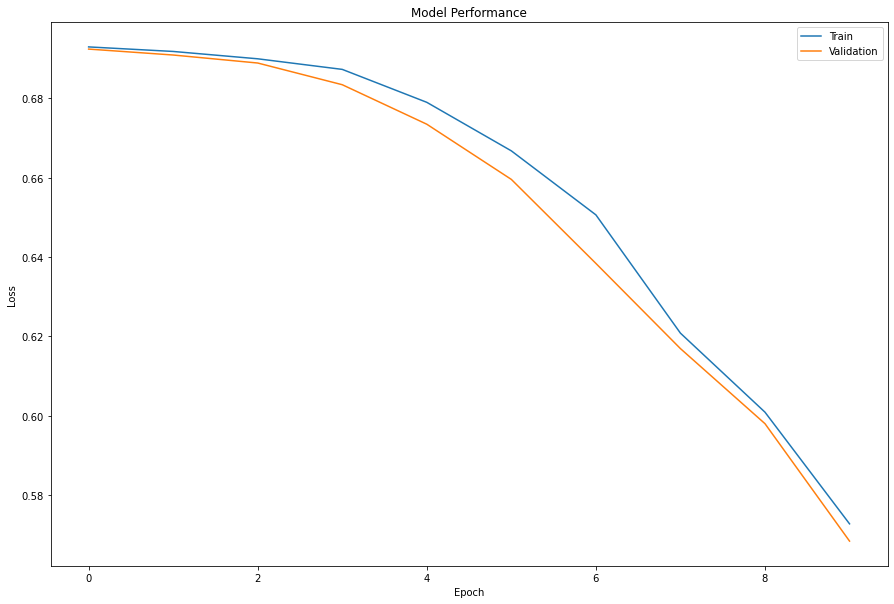

In [9]:
import matplotlib.pyplot as plt
#Loss Visualization for data training and validation

plt.figure(figsize=(15,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [10]:
model = tf.keras.models.load_model("CNNP3.model")

# Data Latih

In [11]:
prediction = model.predict(Xtrain2)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.71505374

In [12]:
m = tf.keras.metrics.Precision()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.7219858

In [13]:
m = tf.keras.metrics.Recall()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.6906377

In [14]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

228.0

In [15]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

196.0

In [16]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

555.0

In [17]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

509.0

# Data Validasi

In [18]:
prediction = model.predict(Xval)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.829582

In [19]:
m = tf.keras.metrics.Precision()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.8976378

In [20]:
m = tf.keras.metrics.Recall()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.74025977

In [21]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

80.0

In [22]:
m = tf.keras.metrics.FalsePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

26.0

In [23]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

288.0

In [24]:
m = tf.keras.metrics.TruePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

228.0

# Data Uji

In [25]:
prediction = model.predict(Xtest)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.7358491

In [26]:
m = tf.keras.metrics.Precision()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.76875

In [27]:
m = tf.keras.metrics.Recall()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.66847825

In [28]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

61.0

In [29]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

37.0

In [30]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

150.0

In [31]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

123.0